<a href="https://colab.research.google.com/github/DGkurnia/cnkproject/blob/main/BMLP_Derfansyah_Guswiranata_Kurnia_AirBNB_clasif.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pengenalan diri
## Nama lengkap (panggilan): Derfansyah Guswiranata Kurnia (wira)
## Identitas dicoding : dgkurnia
## email dicoding : weerakurnia@gmail.com

# **1. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [65]:
#Perpustakaan dasar
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [66]:
#instalasi perpustakaan dari google drive
import sys
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [67]:
#seksi RobustScaler
from sklearn.preprocessing import RobustScaler

In [103]:
#perpustakaan untuk akurasi
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, accuracy_score, r2_score, f1_score

In [89]:
#pemeriksaan matriks
from sklearn.metrics import classification_report, confusion_matrix

In [69]:
#seksi tensor flow
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import models, layers

In [70]:
#lanjutan perpustakaan
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
#lanjut

In [71]:
!pip install catboost
from catboost import CatBoostRegressor
from sklearn.model_selection import GridSearchCV

# **2. Memuat Dataset dari Hasil Clustering**

Memuat dataset hasil clustering dari file CSV ke dalam variabel DataFrame.

In [75]:
#Instalasi dataset dari Google Drive
clabnb = pd.read_csv('/content/drive/MyDrive/csv-files/clusairbnb.csv')
#persiapan salinan
clabnbii = clabnb.copy()
clabnbii.head(10)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,Cluster
0,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4,1,194,unit asing
1,5238,Cute & Cozy Lower East Side 1 bdrm,7549,Ben,Manhattan,Chinatown,40.71344,-73.99037,Entire home/apt,150,1,160,2019-06-09,1,4,188,unit asing
2,6848,Only 2 stops to Manhattan studio,15991,Allen & Irina,Brooklyn,Williamsburg,40.70837,-73.95352,Entire home/apt,140,2,148,2019-06-29,1,1,46,unit asing
3,7097,Perfect for Your Parents + Garden,17571,Jane,Brooklyn,Fort Greene,40.69169,-73.97185,Entire home/apt,215,2,198,2019-06-28,1,1,321,unit asing
4,7726,Hip Historic Brownstone Apartment with Backyard,20950,Adam And Charity,Brooklyn,Crown Heights,40.67592,-73.94694,Entire home/apt,99,3,53,2019-06-22,4,1,21,unit asing
5,8490,"MAISON DES SIRENES1,bohemian apartment",25183,Nathalie,Brooklyn,Bedford-Stuyvesant,40.68371,-73.94028,Entire home/apt,120,2,88,2019-06-19,0,2,233,unit asing
6,11708,Cute apt in artist's home,44145,Tyrome,Brooklyn,Bushwick,40.70186,-73.92745,Entire home/apt,85,2,231,2019-06-22,1,2,22,unit asing
7,12343,BEST BET IN HARLEM,47727,Earl,Manhattan,Harlem,40.81175,-73.94478,Entire home/apt,150,7,97,2019-06-13,0,1,309,unit asing
8,14314,Greenpoint Place...Has It All!,56246,Jeanne,Brooklyn,Greenpoint,40.73506,-73.95392,Entire home/apt,144,2,328,2019-06-29,2,1,234,unit asing
9,16326,Comfortable 4-bedroom apt in family house.,63588,Dimitri,Brooklyn,Prospect Heights,40.67811,-73.96428,Entire home/apt,200,30,143,2019-01-26,1,2,297,unit asing


## Pemeriksaan kolom numerik melalui matriks korelasi

In [76]:
#inspeksi kolom numerik
numdf = clabnbii.select_dtypes(include=[np.number]).copy()
numdf.head(10)
#ke eksekusi

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,3831,4869,40.68514,-73.95976,89,1,270,4,1,194
1,5238,7549,40.71344,-73.99037,150,1,160,1,4,188
2,6848,15991,40.70837,-73.95352,140,2,148,1,1,46
3,7097,17571,40.69169,-73.97185,215,2,198,1,1,321
4,7726,20950,40.67592,-73.94694,99,3,53,4,1,21
5,8490,25183,40.68371,-73.94028,120,2,88,0,2,233
6,11708,44145,40.70186,-73.92745,85,2,231,1,2,22
7,12343,47727,40.81175,-73.94478,150,7,97,0,1,309
8,14314,56246,40.73506,-73.95392,144,2,328,2,1,234
9,16326,63588,40.67811,-73.96428,200,30,143,1,2,297


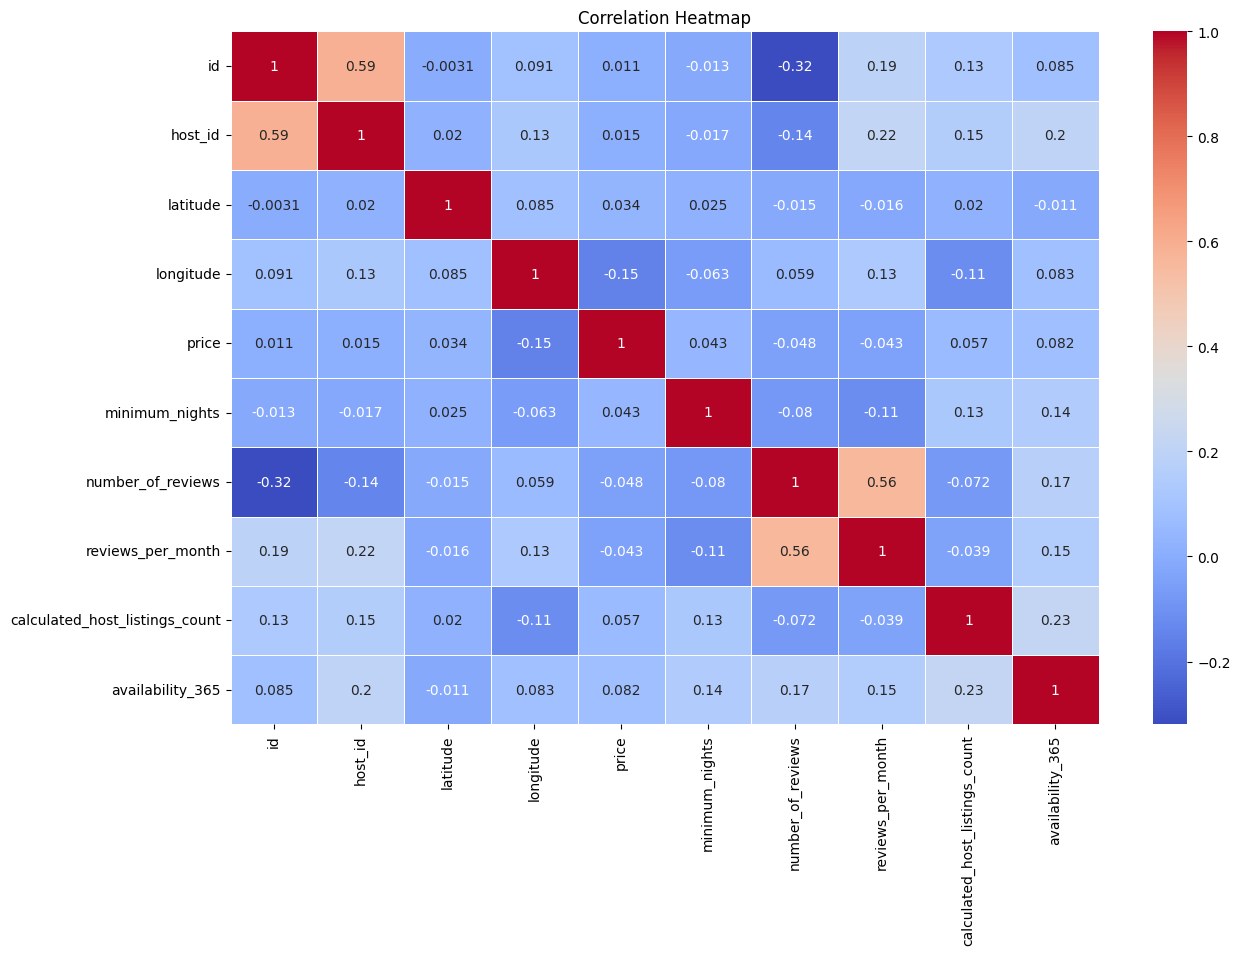

In [77]:
#perhitungan matriks korelasi
matkor = numdf.corr()
#ilustrasi grafik melalui denag
plt.figure(figsize=(14, 9))
sns.heatmap(matkor, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

Dari hasil inspeksi melalui korelasi, ada 8 kolom yang cendring. Namun, ada empat kolom yang penting dari hasil pembentukan kluster

# **3. Data Splitting**

Tahap Data Splitting bertujuan untuk memisahkan dataset menjadi dua bagian: data latih (training set) dan data uji (test set).

In [78]:
#inspeksi kolom
numdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 10 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   host_id                         48895 non-null  int64  
 2   latitude                        48895 non-null  float64
 3   longitude                       48895 non-null  float64
 4   price                           48895 non-null  int64  
 5   minimum_nights                  48895 non-null  int64  
 6   number_of_reviews               48895 non-null  int64  
 7   reviews_per_month               48895 non-null  int64  
 8   calculated_host_listings_count  48895 non-null  int64  
 9   availability_365                48895 non-null  int64  
dtypes: float64(2), int64(8)
memory usage: 3.7 MB


pengambilan kolom berawal dari harga

In [79]:
#insiasiasi pelatihan
X = numdf[['minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']].copy()
y = numdf['price'].copy()

In [80]:
#Deklarasi nilai
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# **4. Membangun Model Klasifikasi**


## **a. Membangun Model Klasifikasi**

Setelah memilih algoritma klasifikasi yang sesuai, langkah selanjutnya adalah melatih model menggunakan data latih.

Berikut adalah rekomendasi tahapannya.
1. Pilih algoritma klasifikasi yang sesuai, seperti Logistic Regression, Decision Tree, Random Forest, atau K-Nearest Neighbors (KNN).
2. Latih model menggunakan data latih.

In [81]:
#Tahap 'seleksi fitur'
scaler = RobustScaler()
Xtrscal = scaler.fit_transform(X_train) #Latihan
Xtescal = scaler.transform(X_test) #uji

In [ ]:
#persiapan regresi linear


### Deskripsikan algoritma yang dipakai
#### Rincian algoritma yang dipakai



## **b. Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Lakukan prediksi menggunakan data uji.
2. Hitung metrik evaluasi seperti Accuracy dan F1-Score (Opsional: Precision dan Recall).
3. Buat confusion matrix untuk melihat detail prediksi benar dan salah.

Tulis hasil evaluasi algoritma yang digunakan, jika Anda menggunakan 2 algoritma, maka bandingkan hasilnya.

## **c. Tuning Model Klasifikasi (Optional)**

Gunakan GridSearchCV, RandomizedSearchCV, atau metode lainnya untuk mencari kombinasi hyperparameter terbaik

In [108]:
#Proses 'penyetelan' dengan GridsearchCV (inisiasi)
class EarlyStoppingByAccuracy(keras.callbacks.Callback):
    def __init__(self, min_delta=0, patience=10, value_to_stop=None, mode='auto'):
        super(EarlyStoppingByAccuracy, self).__init__()

        self.min_delta = min_delta
        self.patience = patience

        if isinstance(value_to_stop, str) and value_to_stop.lower() == "max":
            self.value_to_stop = float('-inf')

        elif isinstance(value_to_stop, int):
            self.value_to_stop = value_to_stop

        else :
             raise ValueError('value_to_stop should either be None or integer')

    def on_epoch_end(self, epoch, logs={}):
        # Ensure consistent indentation (4 spaces) within the method
        current_value = logs.get('val_accuracy')

        if current_value is not None and current_value > self.value_to_stop :
            self.stopped_epoch = epoch + 1

        if hasattr(self, 'validation_data') and hasattr(self.validation_data , '__len__'):
            warnings.warn(
                   f"Epoch {epoch+1}: early stopping.\n"
                   f"Stop val_acc={current_value:.8f}"
                )

        elif current_value is not None:
            warnings.warn(
                    f"Epoch {epoch+1}, early stopping.\n"
                    f"Stop acc={current_value:.8f}"
                 )

    def on_train_begin(self,*args,**kwargs):

       """Is called at the beginning of training."""

       # Pengizinan
       super().on_train_begin(*args,**kwargs) # Ensure consistent indentation here as well

       """Is called at the beginning of training."""

       # Pengizinan
       super().on_train_begin(*args,**kwargs) # Ensure consistent indentation here as well

In [ ]:
#Fasa oemanggilan
wrapper = KerasRegressor(build_fn=lambda epochs,batchsize:**create_model(),verbose=0,callbacks=[EarlyStoppingByAccuracy(min_delta=.01,patience=20,value_to_stop=.87)])

## **d. Evaluasi Model Klasifikasi setelah Tuning (Optional)**

Berikut adalah rekomendasi tahapannya.
1. Gunakan model dengan hyperparameter terbaik.
2. Hitung ulang metrik evaluasi untuk melihat apakah ada peningkatan performa.

In [ ]:
#Type your code here

## **e. Analisis Hasil Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Bandingkan hasil evaluasi sebelum dan setelah tuning (jika dilakukan).
2. Identifikasi kelemahan model, seperti:
  - Precision atau Recall rendah untuk kelas tertentu.
  - Apakah model mengalami overfitting atau underfitting?
3. Berikan rekomendasi tindakan lanjutan, seperti mengumpulkan data tambahan atau mencoba algoritma lain jika hasil belum memuaskan.

In [ ]:
#Perbandingan inspeksi
